In [15]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [16]:
# Reading the data from csv file
co2_df = pd.read_csv("owid-co2-data.csv")

# Reading the data from github
# co2_df = pd.read_csv("https://github.com/owid/co2-data/blob/c1f025b6b190ca8d14ea8dab4f83883af79d286f/owid-co2-data.csv")

In [17]:
#Exploring the dataframe

print(co2_df.columns)
print('-'*50)
print(co2_df.describe())
print('-'*50)
print(co2_df.info())
print('-'*50)
print("length of total dataframe is: ", len(co2_df))

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [18]:
# Removing unnecessary data

useless_columns = ['iso_code', 'cement_co2', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2','energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita','land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'other_co2_per_capita',
       'other_industry_co2', 'primary_energy_consumption',
       'share_global_cement_co2', 'share_global_co2',
       'share_global_co2_including_luc', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_luc_co2', 'share_global_oil_co2',
       'share_global_other_co2', 'share_of_temperature_change_from_ghg',
       'temperature_change_from_ch4', 'temperature_change_from_co2',
       'temperature_change_from_ghg', 'temperature_change_from_n2o',
       'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2',
       'trade_co2_share']

co2_useful_df = co2_df.drop(columns = useless_columns)
co2_useful_df = co2_useful_df.dropna(axis = 1, how = 'all')


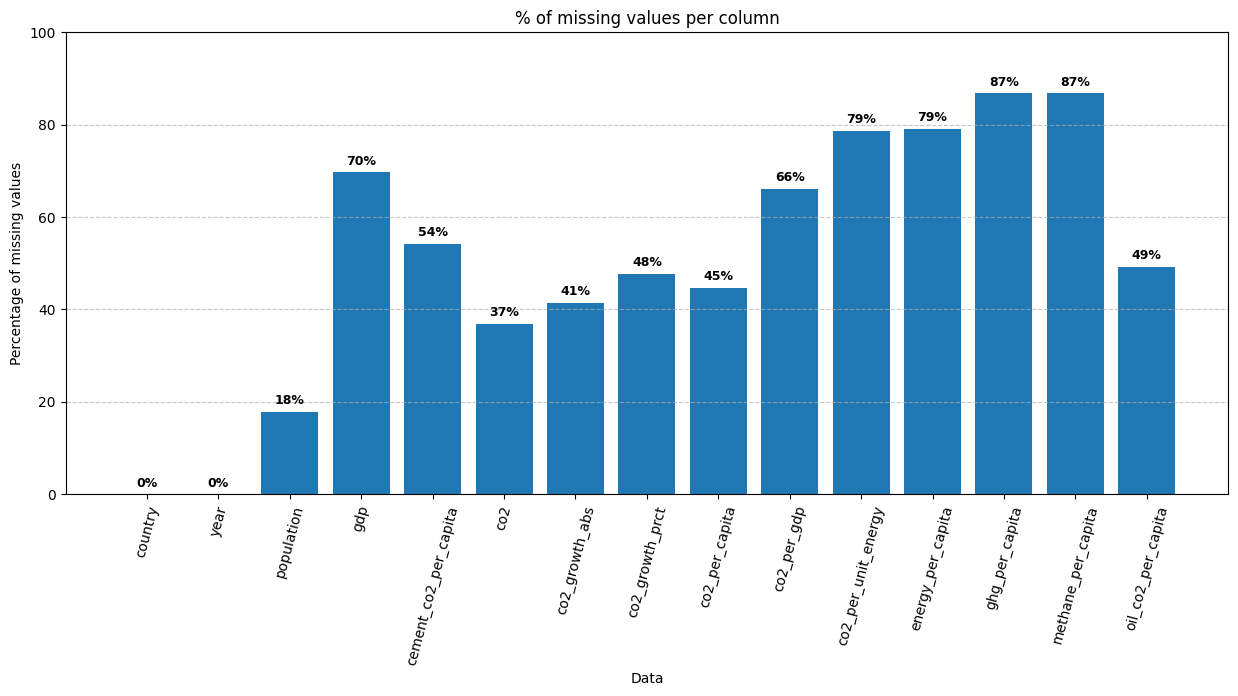

In [19]:
## Plotting the percentage of missing values
fig, ax = plt.subplots(figsize=(15, 6))

data = co2_useful_df.columns
percentage_missing = (co2_useful_df.isnull().sum()/len(co2_useful_df) *100).tolist()

ax.bar(data, percentage_missing)
bar_width = 0.5  # Adjust the width of the bars
bar_positions = range(len(data))

plt.xlabel('Data')
plt.ylabel('Percentage of missing values')
plt.title('% of missing values per column')
plt.xticks(rotation=75)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(percentage_missing):
    ax.text(i, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

# Question 1: 
## What is the biggest predictor of a large CO2 output per capita of a country?

To answer this question, we will look at the available per-capita data. 

## Considerations:

1. Outcome Variable:

What does "large CO2 output per capita" mean? Is it an absolute value or a value relative to the country's population?

2. Potential Predictors:

What variables could potentially influence CO2 output per capita? 
- From our dataframe, common predictors might include GDP, energy use per capita, fossil fuel use.

3. Data Cleaning and Handling Missing Values:

Assess the dataset for missing values and decide on an approach to handle them.

4. Filtering Relevant Data:

What is the relevant data?
Will we consider static data or time trends?
Which statistical analysis methods will we use?
How will we visually represent the data?

## Made Assumptions:
Large CO2 output per capita is defined as a high value of CO2 emissions per capita in metric tons.
Potential predictors include GDP per capita, cement use, and type of energy consumption.
Data cleaning involves handling missing values and excluding incomplete or inaccurate information.
Statistical analysis will involve correlation or regression analysis to identify strong associations.
Visual representations will be used to illustrate relationships.

# Conclusion:
The data shows that there is a strong correlation between CO2-related variables such as CO2 per gdp, cement CO2 per capita, and CO2 per unit energy. The biggest predictor is CO2 per gdp, followed by cement CO2 per gdp. These findings suggest that industrial activities, especially those related to cement production, and the overall carbon intensity of a country's economy (measured by CO2 emissions per GDP and per unit of energy) play crucial roles in determining the CO2 emissions per capita.

/var/folders/_q/_26hhhjx1_gdbzzmm_rp5ns00000gn/T/ipykernel_19999/2695378350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1.loc[:, 'gdp_per_capita'] = df_q1['gdp'] / df_q1['population']


Coefficients:
 gdp_per_capita           2.552618e-04
population              -3.603117e-10
cement_co2_per_capita    7.204667e+00
co2_per_gdp              9.630285e+00
co2_per_unit_energy      8.004950e-02
dtype: float64


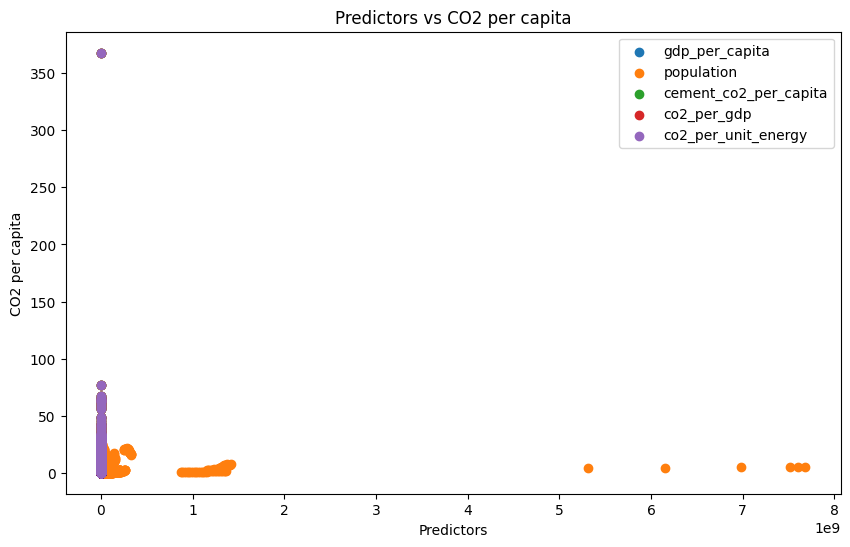

The biggest predictor is: co2_per_gdp with a coefficient of: 9.630284779919258


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Filtering useful data
df_q1 = co2_useful_df.dropna()
df_q1.loc[:, 'gdp_per_capita'] = df_q1['gdp'] / df_q1['population']
X = df_q1[['gdp_per_capita', 'population', 'cement_co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy']]
y = df_q1['co2_per_capita']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Perform linear regression
model = LinearRegression()
model.fit(X_imputed, y)

# Coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:\n", coefficients)

plt.figure(figsize=(10, 6))

for col in X.columns:
    plt.scatter(X_imputed[col], y, label=col)

plt.xlabel("Predictors")
plt.ylabel("CO2 per capita")
plt.title("Predictors vs CO2 per capita")
plt.legend()
plt.show()
print('The biggest predictor is:', coefficients.idxmax(), 'with a coefficient of:', max(coefficients))

# Question 2
## Which countries are making the biggest stride in decreasing CO2 output?

## Considerations

- Outcome Variable:

"Decreasing CO2 output" refers to a negative trend in CO2 emissions over time.

- Data Cleaning and Handling Missing Values:

Assess the dataset for missing values, particularly in the CO2-related columns and relevant predictors.
Decide on an approach to handle missing values, considering imputation or exclusion.

- Filtering Relevant Data:

Focus on a temporal range from the year 2000 to analyze the decrease over time.
Visualize trends and identify countries with the most significant decreases.

## Made assumptions
A significant decrease is defined by a negative trend in CO2 emissions.
Relevant predictors include the year and various factors contributing to CO2 reduction.
Data cleaning involves handling missing values and excluding incomplete or inaccurate information.
Statistical analysis involves calculating average annual changes and identifying top decreasing countries.
Visual representations will illustrate trends over time.

## Conclusion
The analysis of the trends in CO2 emissions reveals that certain countries are making significant strides in decreasing CO2 output. By focusing on the average annual changes, we can identify countries with consistent negative trends, showcasing their commitment to reducing carbon emissions. Although the data is skewed due to the inclusion of war-stricken countries, Denmark emerges as the global leader in reducing carbon emissions.

Top decreasing countries:
 country
Denmark          -2.770000
Ukraine          -2.745348
United Kingdom   -2.333739
Syria            -2.074174
Greece           -1.987652
Name: co2_growth_prct, dtype: float64


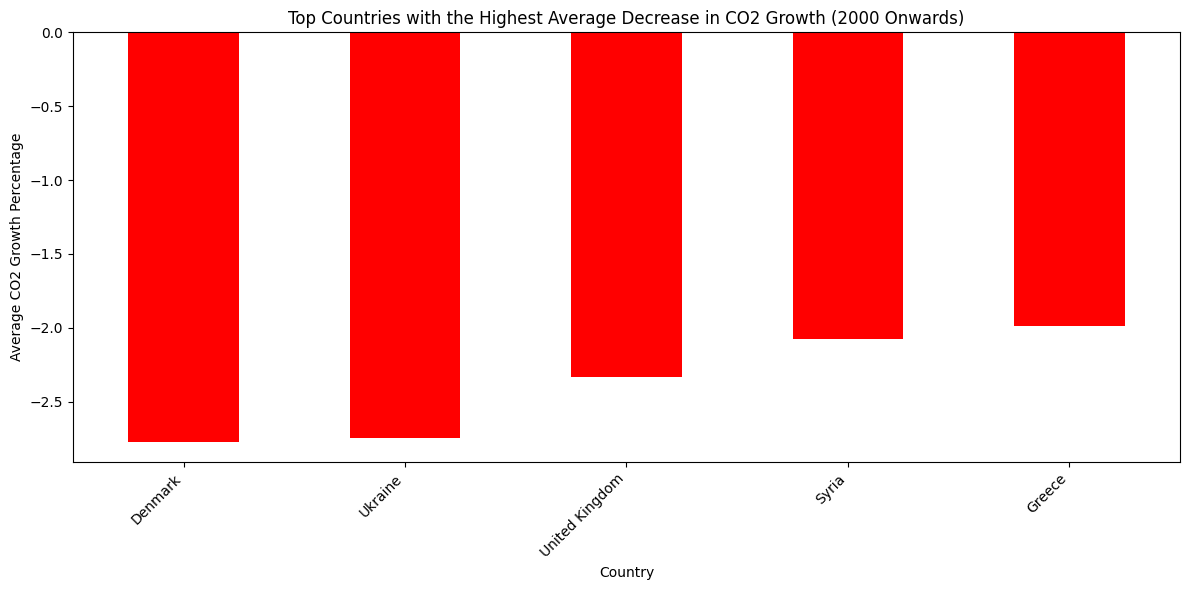

The country with the largest decrease in CO2 output since 2000 is: Denmark


In [21]:
# Focusing on latest data, from 2000 onwards
df_q2 = co2_useful_df[co2_useful_df['year'] >= 2000]

avg_growth_by_country = df_q2.groupby('country')['co2_growth_prct'].mean()
top_decreasing_countries = avg_growth_by_country.nsmallest(5)

print("Top decreasing countries:\n", top_decreasing_countries)

plt.figure(figsize=(12, 6))
top_decreasing_countries.plot(kind='bar', color='red')
plt.title('Top Countries with the Highest Average Decrease in CO2 Growth (2000 Onwards)')
plt.xlabel('Country')
plt.ylabel('Average CO2 Growth Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('The country with the largest decrease in CO2 output since 2000 is:', top_decreasing_countries.idxmin())

# Question 3:
## Which non-fossil fuel energy technology will have the best price in the future?

## Considerations
- Outcome Variable:

"Best price in the future" implies a cost-effective and competitive pricing for non-fossil-fuel energy technologies.

- Filtering Relevant Data:

Focus on data related to non-fossil-fuel energy technologies.
Utilize linear regression analysis to identify relationships between predictors and future pricing.

## Assumptions
Best price in the future is defined as cost-effectiveness and competitive pricing.
Relevant predictors include the type of energy technology and external factors influencing pricing.
Data cleaning involves handling missing values and excluding incomplete or inaccurate information.
Statistical analysis involves linear regression to understand relationships between predictors and future pricing.
Visual representations may include trendlines depicting future pricing trends.

## Conclusions
The analysis of non-fossil-fuel energy technologies indicates that wind and solar energies, may have the most favorable pricing trends in the future. 


In [22]:
# Reading data from csv
energy_df = pd.read_csv("owid-energy-data.csv")

# Reading data from github
# energy_df = pd.read_csv("https://github.com/owid/energy-data/blob/1b5447b23f825702d7e5457814b6d35bc0232b05/owid-energy-data.csv")

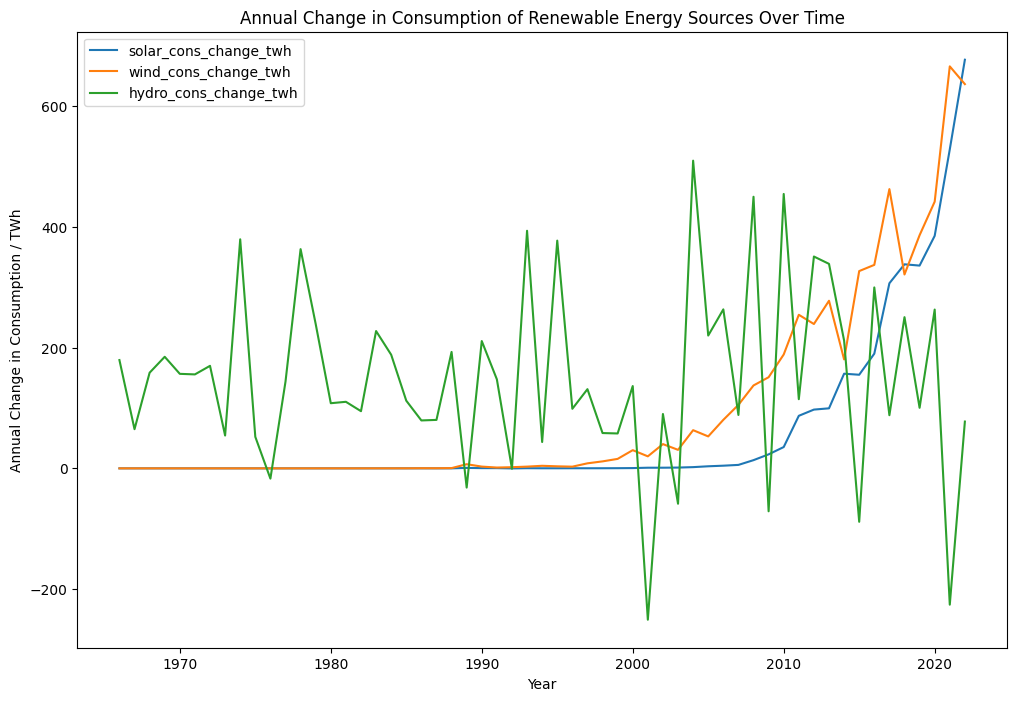

In [23]:
useful_col = ['country', 'year', 'solar_cons_change_twh', 'wind_cons_change_twh',
                        'hydro_cons_change_twh']

energy_useful_df = energy_df[useful_col]
energy_useful_df = energy_useful_df[energy_useful_df['country'] == 'World']
energy_useful_df = energy_useful_df.dropna(subset=useful_col[2:])

# Visualize the trends over time
plt.figure(figsize=(12, 8))

for source in useful_col[2:]:
    plt.plot(energy_useful_df['year'], energy_useful_df[source], label=source)

plt.xlabel('Year')
plt.ylabel('Annual Change in Consumption / TWh')
plt.title('Annual Change in Consumption of Renewable Energy Sources Over Time')
plt.legend()
plt.show()